In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

PCA result

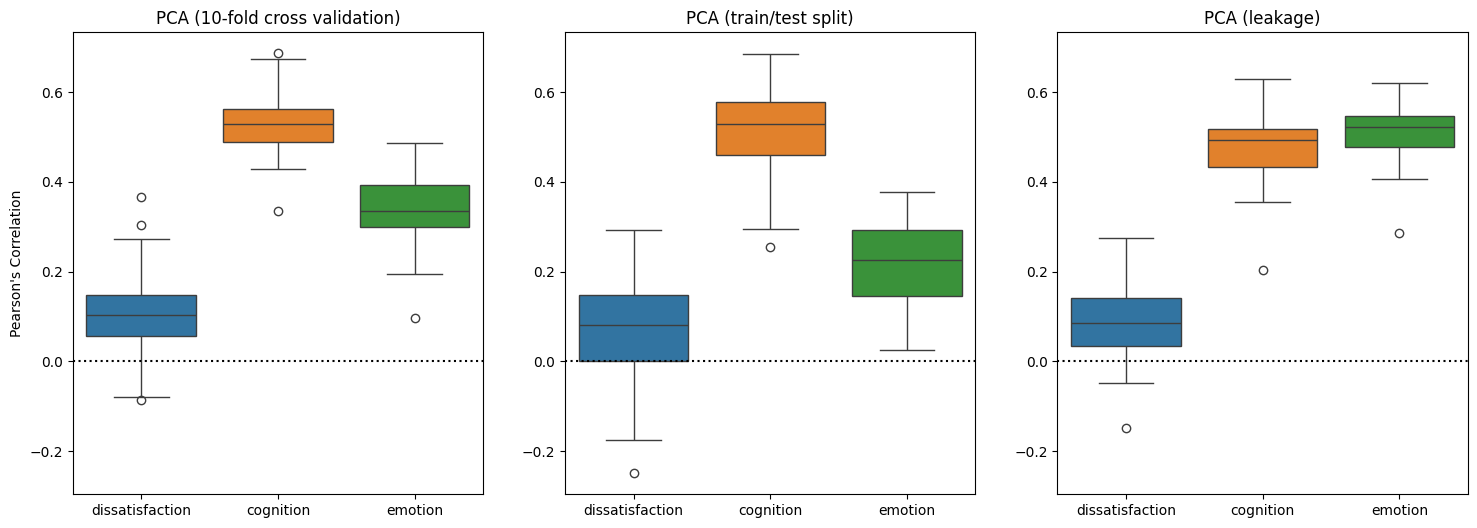

In [32]:
df_pca0_cv = pd.read_csv("results/pca_results/scores_krr_pca__pca0.csv")
df_pca1_cv = pd.read_csv("results/pca_results/scores_krr_pca__pca1.csv")
df_pca2_cv = pd.read_csv("results/pca_results/scores_krr_pca__pca2.csv")

df_pca0_split = pd.read_csv("results/pca_results/scores_pca_tts_varimax_satisf.csv")
df_pca1_split = pd.read_csv("results/pca_results/scores_pca_tts_varimax_cog.csv")
df_pca2_split = pd.read_csv("results/pca_results/scores_pca_tts_varimax_er.csv")

df_pca0_leakage = pd.read_csv("results/pca_results/scores_pca_leakage_varimax_satisf.csv")
df_pca1_leakage = pd.read_csv("results/pca_results/scores_pca_leakage_varimax_cog.csv")
df_pca2_leakage = pd.read_csv("results/pca_results/scores_pca_leakage_varimax_er.csv")

data_r_corr_cv = {
    'dissatisfaction' : df_pca0_cv["test_r_corr"],
    'cognition' : df_pca1_cv["test_r_corr"],
    'emotion' : df_pca2_cv["test_r_corr"],
    'cvkind': "CV",
    'rotator': "no",
}

data_pca_leakage = {
    'dissatisfaction' : df_pca0_leakage["test_r_corr"],
    'cognition' : df_pca1_leakage["test_r_corr"],
    'emotion' : df_pca2_leakage["test_r_corr"],
}

data_pca_split = {
    'dissatisfaction' : df_pca0_split["test_r_corr"],
    'cognition' : df_pca1_split["test_r_corr"],
    'emotion' : df_pca2_split["test_r_corr"],
}


df_pca_cv = pd.DataFrame(data_r_corr_cv)
df_pca_leakage= pd.DataFrame(data_pca_leakage)
df_pca_split= pd.DataFrame(data_pca_split)

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(18, 6),sharey=True) 
sns.boxplot(data=df_pca_cv,ax=ax1)
ax1.set_title("PCA (10-fold cross validation)")
ax1.axhline(0, color="k", ls=":")
ax1.set_ylabel("Pearson's Correlation")


sns.boxplot(data=df_pca_split,ax=ax2)
ax2.set_title("PCA (train/test split)")
ax2.axhline(0, color="k", ls=":")

sns.boxplot(data=df_pca_leakage,ax=ax3)
ax3.set_title("PCA (leakage)")
ax3.axhline(0, color="k", ls=":")


ax2.tick_params(labelleft=True) 
ax3.tick_params(labelleft=True) 
plt.show()


UMAP result

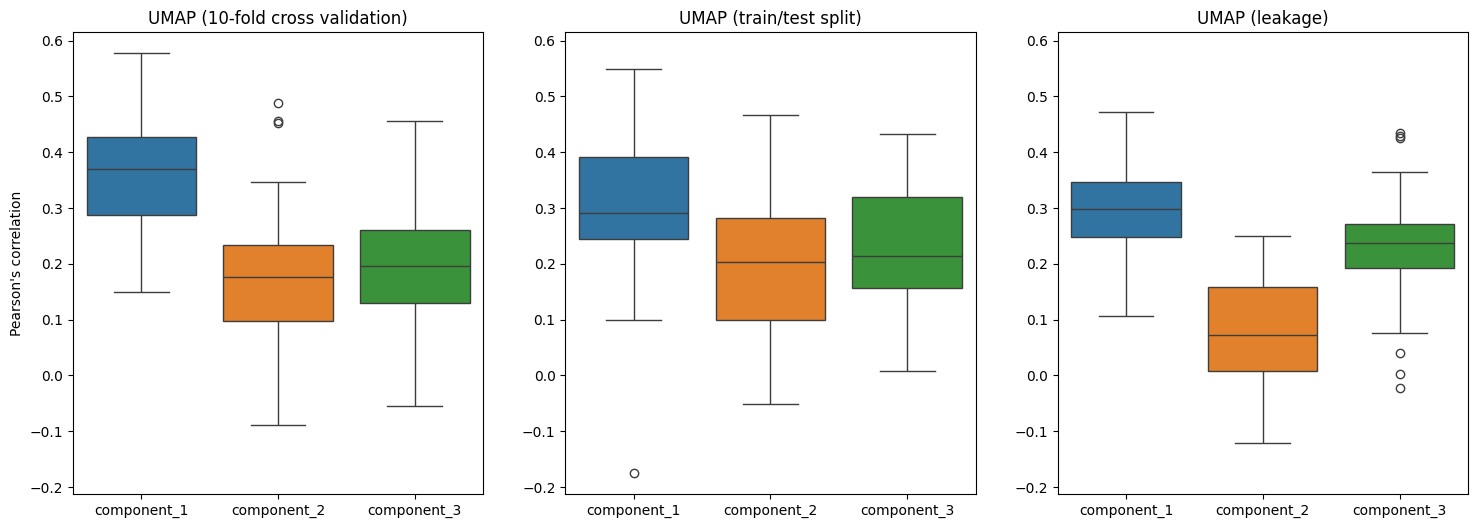

In [33]:
df_umap0_cv = pd.read_csv("results/umap_results/scores_krr_umap__umap0_test.csv")
df_umap1_cv = pd.read_csv("results/umap_results/scores_krr_umap__umap1_test.csv")
df_umap2_cv = pd.read_csv("results/umap_results/scores_krr_umap__umap2_test.csv")

df_umap0_split = pd.read_csv("results/umap_results/scores_krr_split_component_1.csv")
df_umap1_split = pd.read_csv("results/umap_results/scores_krr_split_component_2.csv")
df_umap2_split = pd.read_csv("results/umap_results/scores_krr_split_component_3.csv")

df_umap0_leakage = pd.read_csv("results/umap_results/scores_umap_leakage_component_1.csv")
df_umap1_leakage = pd.read_csv("results/umap_results/scores_umap_leakage_component_2.csv")
df_umap2_leakage = pd.read_csv("results/umap_results/scores_umap_leakage_component_3.csv")

data_r_corr_nmf_cv = {
    "component_1":df_umap0_cv["test_r_corr"],
    "component_2":df_umap1_cv["test_r_corr"],
    "component_3":df_umap2_cv["test_r_corr"],
}

data_r_corr_nmf_split = {
    "component_1":df_umap0_split["test_r_corr"],
    "component_2":df_umap1_split["test_r_corr"],
    "component_3":df_umap2_split["test_r_corr"],
}

data_r_corr_nmf_leakage = {
    "component_1":df_umap0_leakage["test_r_corr"],
    "component_2":df_umap1_leakage["test_r_corr"],
    "component_3":df_umap2_leakage["test_r_corr"],
}

df_r_corr_nmf_cv = pd.DataFrame(data_r_corr_nmf_cv)
df_r_corr_nmf_split = pd.DataFrame(data_r_corr_nmf_split)
df_r_corr_nmf_leakage = pd.DataFrame(data_r_corr_nmf_leakage)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6),sharey=True)
sns.boxplot(df_r_corr_nmf_cv,ax=ax1)
ax1.set_title("UMAP (10-fold cross validation)")
ax1.set_ylabel("Pearson's correlation")
sns.boxplot(df_r_corr_nmf_split,ax=ax2)
ax2.set_title("UMAP (train/test split)")
ax2.set_ylabel("Pearson's correlation")
sns.boxplot(df_r_corr_nmf_leakage,ax=ax3)
ax3.set_title("UMAP (leakage)")
ax3.set_ylabel("Pearson's correlation")

ax1.tick_params(labelleft=True) 
ax2.tick_params(labelleft=True) 
ax3.tick_params(labelleft=True)
plt.show()

NMF result

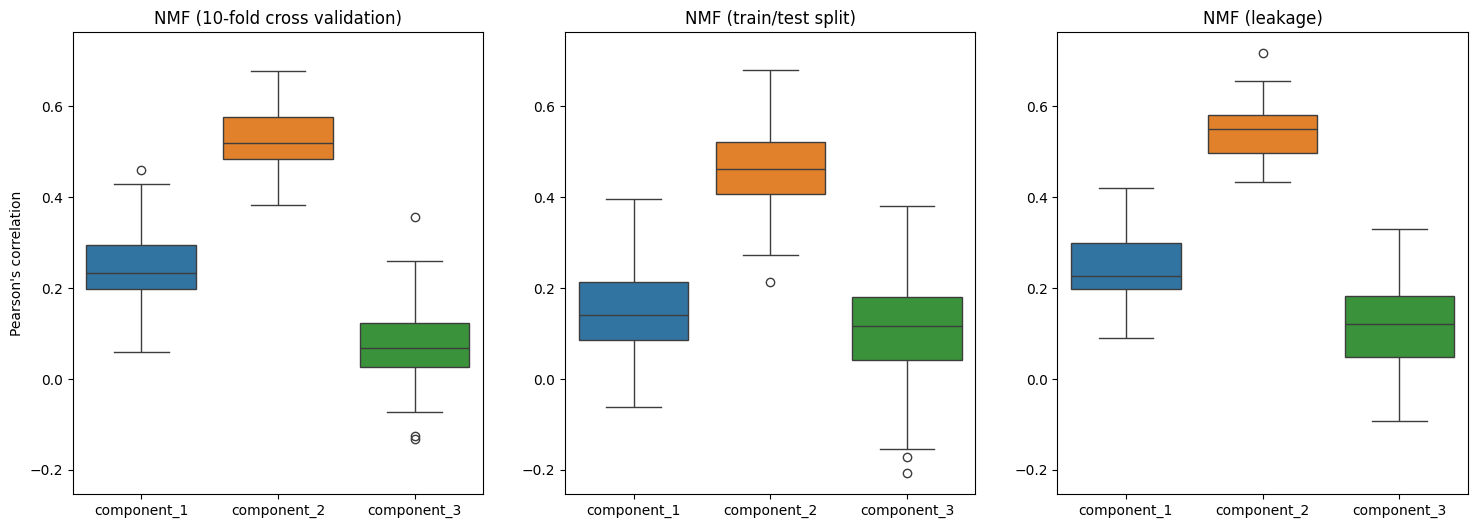

In [34]:
df_nmf0_cv = pd.read_csv("results/nmf_results/scores_krr_nmf__nmf0.csv")
df_nmf1_cv = pd.read_csv("results/nmf_results/scores_krr_nmf__nmf1.csv")
df_nmf2_cv = pd.read_csv("results/nmf_results/scores_krr_nmf__nmf2.csv")

df_nmf0_split = pd.read_csv("results/nmf_results/scores_krr_split_component_1.csv")
df_nmf1_split = pd.read_csv("results/nmf_results/scores_krr_split_component_2.csv")
df_nmf2_split = pd.read_csv("results/nmf_results/scores_krr_split_component_3.csv")

df_nmf0_leakage = pd.read_csv("results/nmf_results/scores_nmf_leakage_component_1.csv")
df_nmf1_leakage = pd.read_csv("results/nmf_results/scores_nmf_leakage_component_2.csv")
df_nmf2_leakage = pd.read_csv("results/nmf_results/scores_nmf_leakage_component_3.csv")

data_r_corr_nmf_cv = {
    "component_1":df_nmf0_cv["test_r_corr"],
    "component_2":df_nmf1_cv["test_r_corr"],
    "component_3":df_nmf2_cv["test_r_corr"],
}

data_r_corr_nmf_split = {
    "component_1":df_nmf0_split["test_r_corr"],
    "component_2":df_nmf1_split["test_r_corr"],
    "component_3":df_nmf2_split["test_r_corr"],
}

data_r_corr_nmf_leakage = {
    "component_1":df_nmf0_leakage["test_r_corr"],
    "component_2":df_nmf1_leakage["test_r_corr"],
    "component_3":df_nmf2_leakage["test_r_corr"],
}

df_r_corr_nmf_cv = pd.DataFrame(data_r_corr_nmf_cv)
df_r_corr_nmf_split = pd.DataFrame(data_r_corr_nmf_split)
df_r_corr_nmf_leakage = pd.DataFrame(data_r_corr_nmf_leakage)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6),sharey=True)
sns.boxplot(df_r_corr_nmf_cv,ax=ax1)
ax1.set_title("NMF (10-fold cross validation)")
ax1.set_ylabel("Pearson's correlation")
sns.boxplot(df_r_corr_nmf_split,ax=ax2)
ax2.set_title("NMF (train/test split)")
ax2.set_ylabel("Pearson's correlation")
sns.boxplot(df_r_corr_nmf_leakage,ax=ax3)
ax3.set_title("NMF (leakage)")
ax3.set_ylabel("Pearson's correlation")

ax1.tick_params(labelleft=True) 
ax2.tick_params(labelleft=True) 
ax3.tick_params(labelleft=True) 
plt.show()

Autoencoder result

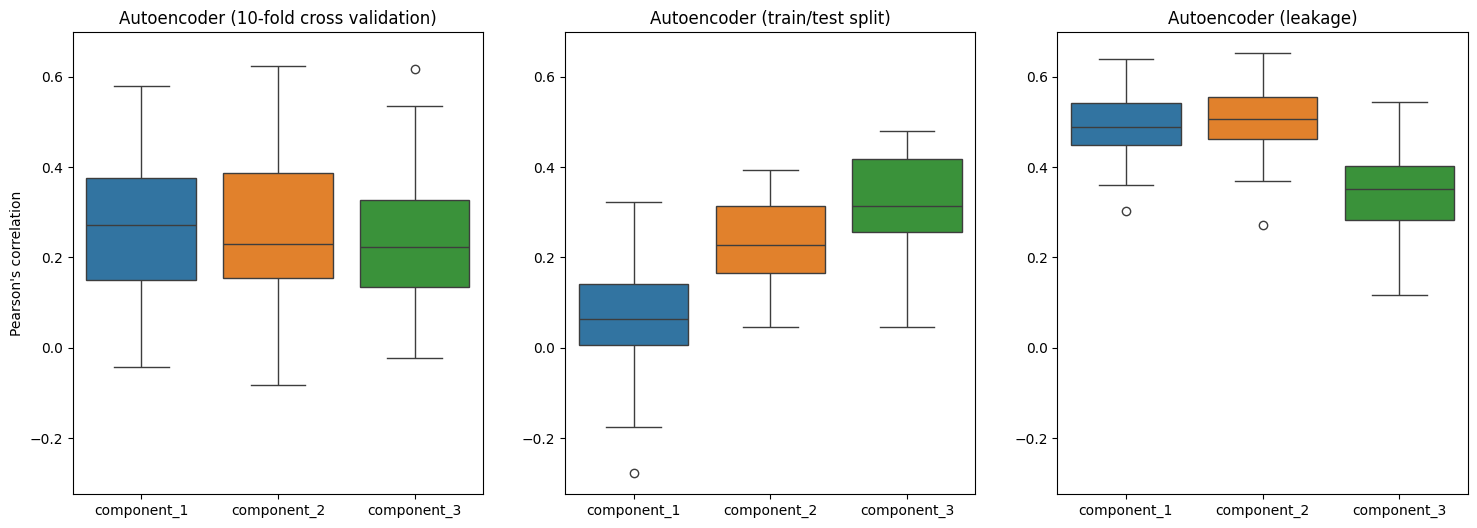

In [35]:
df_autoencoder0_split = pd.read_csv("results/autoencoder_results/scores_krr_autoencoder_component_1_split.csv")
df_autoencoder1_split = pd.read_csv("results/autoencoder_results/scores_krr_autoencoder_component_2_split.csv")
df_autoencoder2_split = pd.read_csv("results/autoencoder_results/scores_krr_autoencoder_component_3_split.csv")

df_autoencoder0_cv = pd.read_csv("results/autoencoder_results/scores_krr_autoencoder_component_1_10fCV_batch32.csv")
df_autoencoder1_cv = pd.read_csv("results/autoencoder_results/scores_krr_autoencoder_component_2_10fCV_batch32.csv")
df_autoencoder2_cv = pd.read_csv("results/autoencoder_results/scores_krr_autoencoder_component_3_10fCV_batch32.csv")

df_autoencoder0_leakage = pd.read_csv("results/autoencoder_results/scores_autoencoder_leakage_component_1.csv")
df_autoencoder1_leakage = pd.read_csv("results/autoencoder_results/scores_autoencoder_leakage_component_2.csv")
df_autoencoder2_leakage = pd.read_csv("results/autoencoder_results/scores_autoencoder_leakage_component_3.csv")

data_r_corr_autoencoder_split = {
    "component_1":df_autoencoder0_split["test_r_corr"],
    "component_2":df_autoencoder1_split["test_r_corr"],
    "component_3":df_autoencoder2_split["test_r_corr"],
}

data_r_corr_autoencoder_cv = {
    "component_1":df_autoencoder0_cv["test_r_corr"],
    "component_2":df_autoencoder1_cv["test_r_corr"],
    "component_3":df_autoencoder2_cv["test_r_corr"],
}

data_r_corr_autoencoder_leakage = {
    "component_1":df_autoencoder0_leakage["test_r_corr"],
    "component_2":df_autoencoder1_leakage["test_r_corr"],
    "component_3":df_autoencoder2_leakage["test_r_corr"],
}

df_r_corr_autoencoder_split = pd.DataFrame(data_r_corr_autoencoder_split)
df_r_corr_autoencoder_cv = pd.DataFrame(data_r_corr_autoencoder_cv)
df_r_corr_autoencoder_leakage = pd.DataFrame(data_r_corr_autoencoder_leakage)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6),sharey=True)
sns.boxplot(df_r_corr_autoencoder_cv,ax=ax1)
ax1.set_title("Autoencoder (10-fold cross validation)")
ax1.set_ylabel("Pearson's correlation")
sns.boxplot(df_r_corr_autoencoder_split,ax=ax2)
ax2.set_title("Autoencoder (train/test split)")
ax2.set_ylabel("Pearson's correlation")
sns.boxplot(df_r_corr_autoencoder_leakage,ax=ax3)
ax3.set_title("Autoencoder (leakage)")
ax3.set_ylabel("Pearson's correlation")

ax1.tick_params(labelleft=True) 
ax2.tick_params(labelleft=True) 
ax3.tick_params(labelleft=True) 
plt.show()